In [12]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torch
from ultralytics import YOLO

COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant',
    'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A', 'handbag',
    'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
    'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli',
    'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
    'N/A', 'dining table', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock',
    'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [13]:
def show_images(images, titles):
    n = len(images)

    fig, axes = plt.subplots(1, n, figsize=(5 * n, 5))
    if n == 1: axes = [axes]

    for i, ax in enumerate(axes):
        if len(images[i].shape) == 3: 
            bgr_image = cv2.cvtColor(images[i], cv2.COLOR_RGB2BGR)
            ax.imshow(bgr_image)
            # the title of this subfigure is titles[i]
        else: ax.imshow(images[i], cmap='gray')
        
        ax.set_title(titles[i])
        ax.axis('off')

    plt.show()

In [14]:
def load_model():
    pass

def get_model(model_name):
    return load_model()

In [15]:
def detect_yolo(image, threshold=0.001):
    # Load YOLO model (pre-trained on COCO dataset)
    model = YOLO("yolov8s")  # Change to "yolov8s" if preferred

    # Perform object detection
    results = model(image)
    
    # Initialize list to store bounding boxes
    boxes = []

    # Iterate through detected objects in results
    for result in results:  # Each result represents detections for one image
        for box in result.boxes:
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()  # Bounding box coordinates
            confidence = box.conf.cpu().numpy()  # Confidence score
            class_id = box.cls.cpu().numpy()  # Class ID
            
            # Filter by confidence threshold and specific class if needed
            if True or (confidence >= threshold and int(class_id) == 0):  # Assuming '0' is the class ID for animals
                boxes.append([int(x1), int(y1), int(x2), int(y2)])

    return boxes


In [16]:
def draw_boxes(image, boxes):
    """
    Draw the bounding boxes on the frame.
    :param frame: The image frame.
    :param boxes: A list of bounding boxes. Each bounding box can be either (x, y, w, h) or (x, y, size).
    :return: The frame with the boxes drawn on it.
    """
    boxed_image = image
    for box in boxes:


        # Ensure coordinates are integers
        x1, y1, x2, y2 = box

        # Draw the rectangle on the frame
        cv2.rectangle(boxed_image, (x1, y1), (x2, y2), (255, 0, 0), 3)

    return boxed_image

In [17]:
# Main function to process a single image
def process_image(input_image_path):
    # Load the image
    image = cv2.imread(input_image_path)
    if image is None:
        raise ValueError(f"Image at path {input_image_path} could not be loaded.")

    boxes = detect_yolo(image)
    annotated_image = draw_boxes(image, boxes)

    return annotated_image

# Main function to process a single image
def process_image_v(img):

    boxes = detect_yolo(img)
    annotated_image = draw_boxes(img, boxes)

    return annotated_image

In [18]:
def array_to_video(images, output_path, fps, frame_size):
    # Initialize the video writer object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4
    out = cv2.VideoWriter(output_path, fourcc, fps, frame_size)

    for img in images:
        out.write(img)

    out.release()  # Release the video writer

In [19]:
def process_video(video_path, frame_limit=10000):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"Error: Unable to open video file {video_path}")
        return

    # Get video properties like FPS (Frames Per Second) and frame size
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frame_size = (frame_width, frame_height)

    new_images = []
    nframes = 0

    while cap.isOpened():
        ret, frame = cap.read()

        if not ret or nframes > frame_limit:
            break  # Exit loop if there are no more frames

        new_image = process_image_v(frame)
        new_images.append(new_image)

        nframes+=1
        print(nframes)

    cap.release()  # Release the video capture object

    # Create a new video from the processed frames
    output_path = 'out_2.mp4'
    array_to_video(new_images, output_path, fps, frame_size)

    print(f"Video saved as {output_path}")

In [20]:
input_image_path = "/home/theo/Documents/Unif/Master/ChimpRec/Code/Test - images"
model_name = "megadetector"


0: 640x384 (no detections), 56.3ms
Speed: 1.3ms preprocess, 56.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 384)


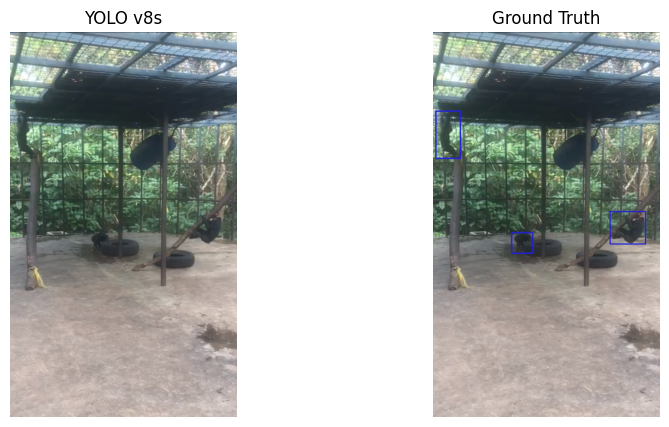


0: 640x384 1 person, 1 elephant, 64.8ms
Speed: 2.0ms preprocess, 64.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


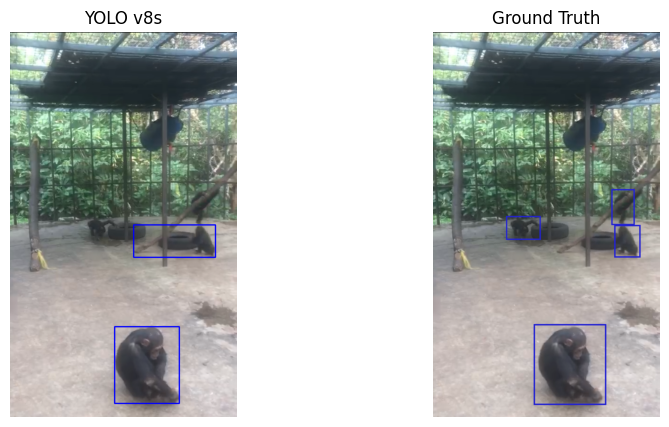


0: 640x384 (no detections), 55.1ms
Speed: 1.6ms preprocess, 55.1ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 384)


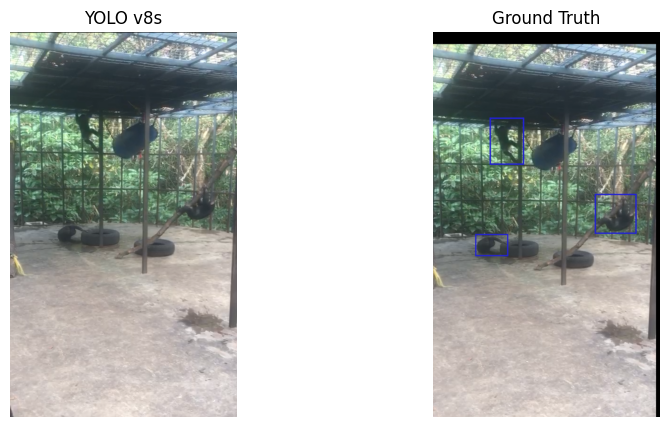


0: 640x384 1 bear, 54.1ms
Speed: 1.4ms preprocess, 54.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)


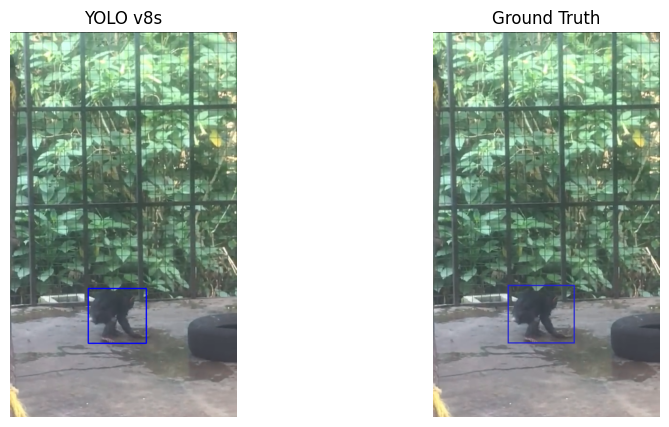


0: 640x384 1 person, 1 car, 51.2ms
Speed: 1.6ms preprocess, 51.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 384)


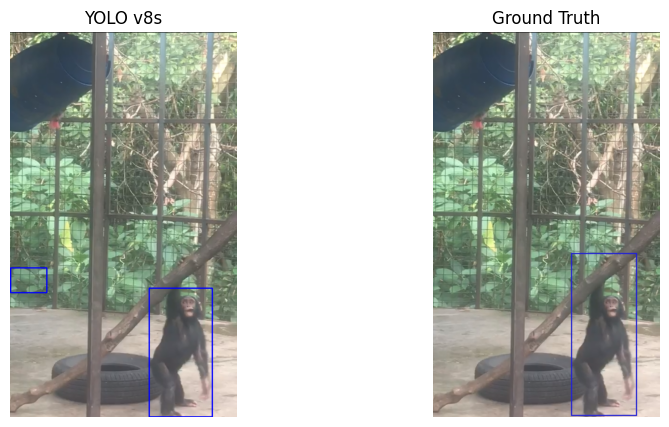


0: 640x384 (no detections), 54.5ms
Speed: 1.5ms preprocess, 54.5ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 384)


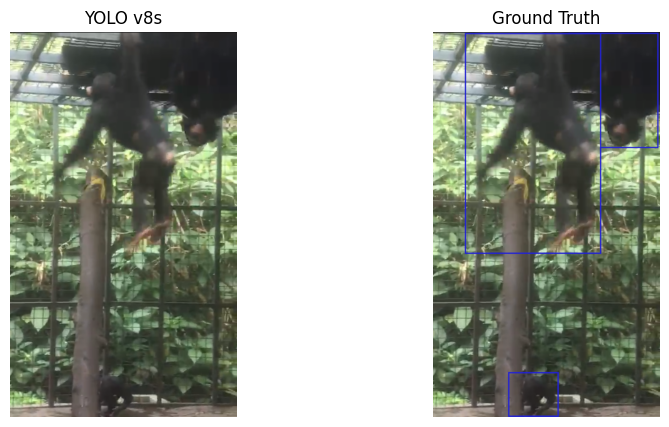


0: 640x384 1 elephant, 3 bears, 58.8ms
Speed: 1.5ms preprocess, 58.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)


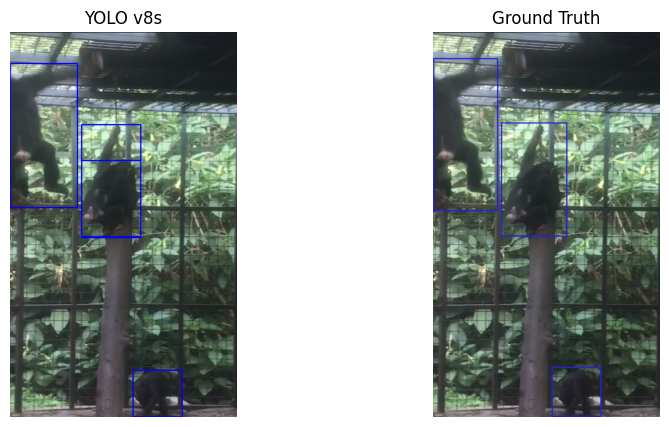


0: 640x384 2 bears, 59.7ms
Speed: 1.6ms preprocess, 59.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


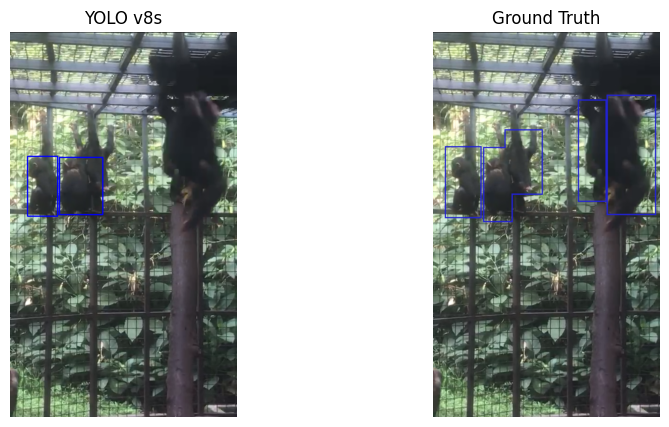


0: 640x384 2 persons, 2 bears, 58.5ms
Speed: 1.8ms preprocess, 58.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)


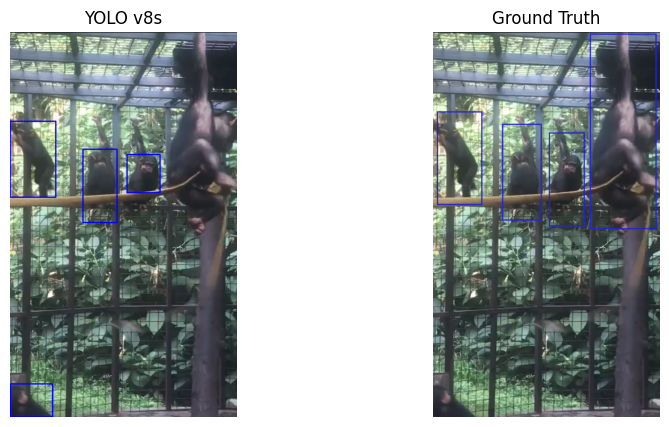


0: 640x384 2 persons, 60.9ms
Speed: 1.6ms preprocess, 60.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)


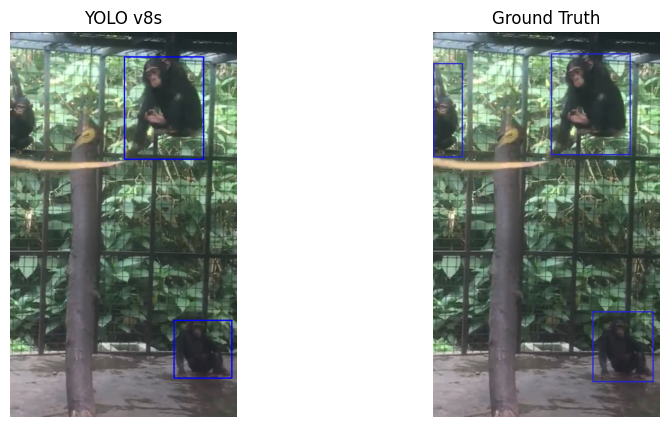


0: 640x384 (no detections), 58.6ms
Speed: 1.5ms preprocess, 58.6ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 384)


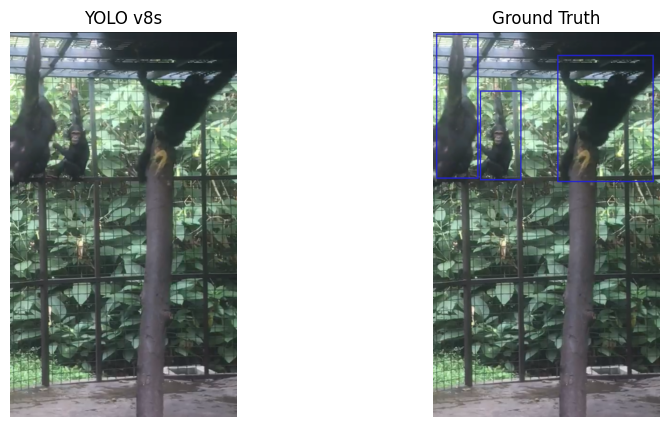


0: 640x384 5 birds, 60.9ms
Speed: 2.1ms preprocess, 60.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


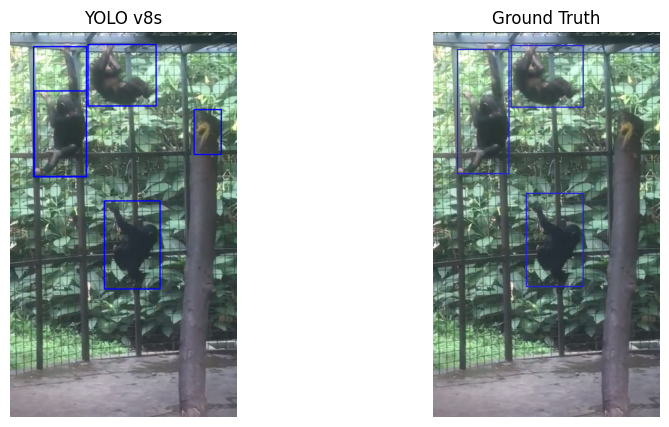

In [21]:
for i in range(1, 13):
    path_blank = f"{input_image_path}/blank/{i}.png"
    path_ground_truth = f"{input_image_path}/ground truth/{i}.png"
    img_pred = process_image(path_blank)
    img_ground_truth = cv2.imread(path_ground_truth)
    show_images(
        [img_pred, img_ground_truth],
        ["YOLO v8s", "Ground Truth"])

In [22]:
process_video("/home/theo/Documents/Unif/Master/ChimpRec/Code/Superpixel R-CNN/Video/Video_1.mp4")


0: 640x384 2 persons, 1 elephant, 50.9ms
Speed: 1.1ms preprocess, 50.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)
1

0: 640x384 2 persons, 1 elephant, 50.9ms
Speed: 1.1ms preprocess, 50.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)
2

0: 640x384 2 persons, 1 elephant, 50.4ms
Speed: 1.3ms preprocess, 50.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)
3

0: 640x384 2 persons, 1 elephant, 52.1ms
Speed: 1.2ms preprocess, 52.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)
4

0: 640x384 1 cow, 1 elephant, 52.7ms
Speed: 0.9ms preprocess, 52.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)
5

0: 640x384 1 person, 2 cows, 53.7ms
Speed: 0.9ms preprocess, 53.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)
6

0: 640x384 2 cows, 1 elephant, 54.3ms
Speed: 1.4ms preprocess, 54.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)
7

0: 640x384 1 cow, 1 elep